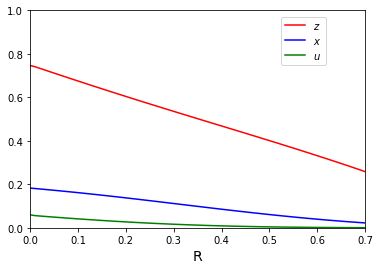

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Inclusive-Fitness Effects
def IFz(z,x,u,Rs,Rns,a,b):
  return ( 1-z-x-u ) * ( 1- (1-Rns)*(1-np.power(u,b))*np.power(x,a)- Rs) / z - Rs
def IFx(z,x,u,Rs,Rns,a,b):
  return ( 1-z-x-u ) * (1- Rns) * (1- np.power(u,b)) * a * np.power(x,a-1) - Rs
def IFu(z,x,u,Rs,Rns,a,b):
  return ( 1-z-x-u ) * (1- Rns) * np.power(x,a) * b * np.power(u,b-1) - Rs

# Evolve population forward in time
def TimeSeries(Rsz,Rnsz,Rsx,Rnsx,Rsu,Rnsu,a,b,step,tf):
  # initialize
  z = 0.1
  x = 0.1
  u = 0.1
  # set up the matrix
  dat = np.empty(shape=(int(tf/step),4),dtype=float)
  dat[0,:]=np.array([z,x,u,(1-z-x-u)])
  # iterations
  for t in range(1,int(tf/step)):
    ## Check the values of z,x,u before calculating the new trait values
    if z + x + u > 1:
      cost = z + x + u
      z = z / cost
      x = x / cost 
      u = u / cost 
      # now group productivity is zero
    ## Calculating new trait values
    znew = z + step * IFz(z,x,u,Rsz,Rnsz,a,b)
    xnew = x + step * IFx(z,x,u,Rsx,Rnsx,a,b)
    unew = u + step * IFu(z,x,u,Rsu,Rnsu,a,b)
    ## Dealing with out-of-boundary values
    znew = np.clip(znew,1E-6,1)
    xnew = np.clip(xnew,1E-6,1)
    unew = np.clip(unew,1E-6,1)
    ## Updating trait values
    z = znew
    x = xnew
    u = unew
    dat[t,:]=np.array([z,x,u,(1-z-x-u)])
  return dat

# Set up parameters
Rns= np.linspace(0,0.7,num=71)
Rs = ( 1/99 ) + ( 98/99 ) * Rns ### assuming group size is 99
a= 1.0/2
b= 1.0/2
tf = 100
step = 1e-02/4
log= np.empty(shape=(Rns.size,5),dtype=float)
# Create log file
out= open('out.txt','w')
out.write("R\tz\tx\tu\tgrp_fit\t\n")
# Execution
for i in range(0, Rns.size):
  yvals = TimeSeries(Rs[i],Rns[i],Rs[i],Rns[i],Rs[i],Rns[i],a,b,step,tf)
  out.write("%f\t" % Rns[i])
  for item in yvals[int(tf/step-1),:]:
    out.write("%f\t" % item)
  out.write("\n")
  log[i,0]= Rns[i]
  log[i,1:5]=yvals[int(tf/step-1),:]
# Closing the file
out.close()

# Plotting
plt.xlabel("R",fontsize=14)
plt.axis((0,0.7,0,1))
plt.plot(Rns, log[:,1], '-r', label=r'$z$') 
plt.plot(Rns, log[:,2], '-b', label=r'$x$')
plt.plot(Rns, log[:,3], '-g', label=r'$u$')
#plt.plot(tvals, yvals[:,3], '--k', label='group productivity') 
plt.legend(loc=(0.75,0.75))
plt.savefig('a0.5_b0.5.pdf')
plt.show()